### Importa√ß√£o dos dados



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

Produto Categoria do Produto    Pre√ßo      Frete  \
0     Assistente virtual          eletronicos   219.08   9.249790   
1         Mesa de jantar               moveis   256.35  11.234305   
2      Jogo de tabuleiro           brinquedos   279.51  21.262681   
3            Micro-ondas     eletrodomesticos  1009.99  54.667344   
4  Cadeira de escrit√≥rio               moveis   446.99  26.964689   

  Data da Compra        Vendedor Local da compra  Avalia√ß√£o da compra  \
0     16/01/2021     Pedro Gomes              SP                    4   
1     18/05/2022  Beatriz Moraes              RJ                    1   
2     15/03/2021      Jo√£o Souza              DF                    1   
3     03/05/2022      Jo√£o Souza              RS                    4   
4     07/11/2020   Larissa Alves              MG                    5   

  Tipo de pagamento  Quantidade de parcelas    lat    lon  
0    cartao_credito                       8 -22.19 -48.79  
1    cartao_credito                       4 -22.25 -42.66  
2    cartao_credito                       1 -15.83 -47.86  
3            boleto                       1 -30.17 -53.50  
4            boleto                       1 -18.10 -44.38

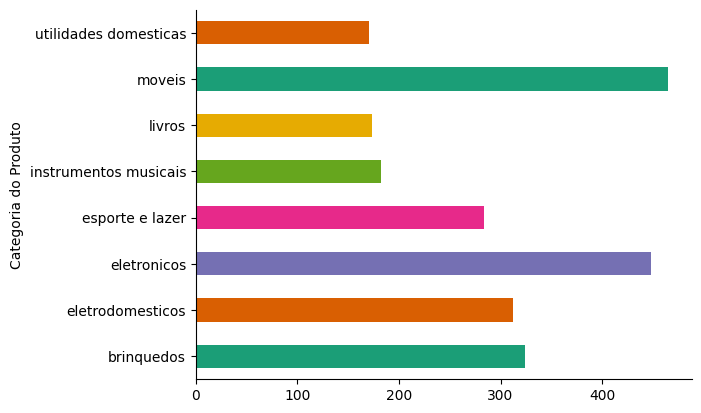

In [23]:
# @title Categoria do Produto

from matplotlib import pyplot as plt
import seaborn as sns
loja.groupby('Categoria do Produto').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

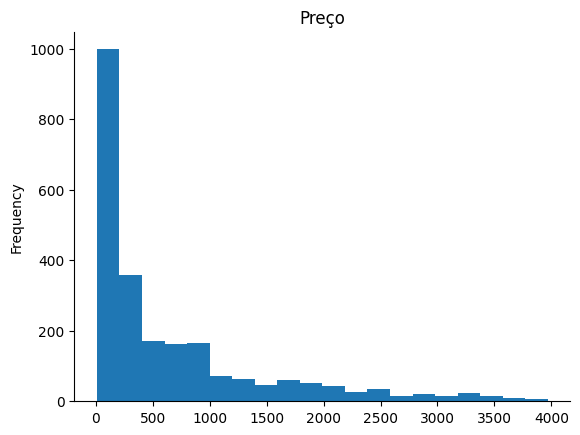

In [ ]:
# @title Pre√ßo

from matplotlib import pyplot as plt
loja['Pre√ßo'].plot(kind='hist', bins=20, title='Pre√ßo')
plt.gca().spines[['top', 'right',]].set_visible(False)

#1. An√°lise do faturamento


In [ ]:
import pandas as pd
from io import StringIO

# Dados de exemplo
dados = StringIO("""
Produto,Categoria do Produto,Pre√ßo,Frete,Data da Compra,Vendedor,Local da compra,Avalia√ß√£o da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,Jo√£o Souza,DF,1,cartao_credito,1,-15.83,-47.86
Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,Jo√£o Souza,RS,4,boleto,1,-30.17,-53.50
Cadeira de escrit√≥rio,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38
""")

# Leitura do DataFrame
df = pd.read_csv(dados, parse_dates=['Data da Compra'], dayfirst=True)

# Criar uma coluna de faturamento (Pre√ßo + Frete)
df['Faturamento'] = df['Pre√ßo'] + df['Frete']

# Ano da compra
df['Ano'] = df['Data da Compra'].dt.year

# Faturamento total
faturamento_total = df['Faturamento'].sum()

# Faturamento por categoria
faturamento_categoria = df.groupby('Categoria do Produto')['Faturamento'].sum()

# Faturamento por vendedor
faturamento_vendedor = df.groupby('Vendedor')['Faturamento'].sum()

# Faturamento por estado
faturamento_estado = df.groupby('Local da compra')['Faturamento'].sum()

# Faturamento por ano
faturamento_ano = df.groupby('Ano')['Faturamento'].sum()

# Ticket m√©dio
ticket_medio = df['Faturamento'].mean()

# Resultados
print(f"Faturamento total: R${faturamento_total:.2f}\n")
print("Faturamento por categoria:\n", faturamento_categoria, "\n")
print("Faturamento por vendedor:\n", faturamento_vendedor, "\n")
print("Faturamento por estado:\n", faturamento_estado, "\n")
print("Faturamento por ano:\n", faturamento_ano, "\n")
print(f"Ticket m√©dio: R${ticket_medio:.2f}")


Faturamento total: R$2335.30

Faturamento por categoria:
 Categoria do Produto
brinquedos           300.772681
eletrodomesticos    1064.657344
eletronicos          228.329790
moveis               741.538994
Name: Faturamento, dtype: float64 

Faturamento por vendedor:
 Vendedor
Beatriz Moraes     267.584305
Jo√£o Souza        1365.430025
Larissa Alves      473.954689
Pedro Gomes        228.329790
Name: Faturamento, dtype: float64 

Faturamento por estado:
 Local da compra
DF     300.772681
MG     473.954689
RJ     267.584305
RS    1064.657344
SP     228.329790
Name: Faturamento, dtype: float64 

Faturamento por ano:
 Ano
2020     473.954689
2021     529.102471
2022    1332.241649
Name: Faturamento, dtype: float64 

Ticket m√©dio: R$467.06


# 2. Vendas por Categoria


In [ ]:
import pandas as pd
from io import StringIO

# Simula√ß√£o dos dados
dados = StringIO("""
Produto,Categoria do Produto,Pre√ßo,Frete,Data da Compra,Vendedor,Local da compra,Avalia√ß√£o da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,Jo√£o Souza,DF,1,cartao_credito,1,-15.83,-47.86
Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,Jo√£o Souza,RS,4,boleto,1,-30.17,-53.50
Cadeira de escrit√≥rio,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38
""")

# Leitura do DataFrame
df = pd.read_csv(dados, parse_dates=['Data da Compra'], dayfirst=True)

# Faturamento (Pre√ßo + Frete)
df['Faturamento'] = df['Pre√ßo'] + df['Frete']

# Contagem de vendas por categoria
vendas_categoria = df.groupby('Categoria do Produto').agg({
    'Produto': 'count',             # n√∫mero de vendas
    'Faturamento': 'sum'            # soma dos valores (pre√ßo + frete)
}).rename(columns={'Produto': 'Quantidade de Vendas'})

# Exibir resultados
print(vendas_categoria)


                      Quantidade de Vendas  Faturamento
Categoria do Produto                                   
brinquedos                               1   300.772681
eletrodomesticos                         1  1064.657344
eletronicos                              1   228.329790
moveis                                   2   741.538994


# 3. M√©dia de Avalia√ß√£o das Lojas

In [ ]:
import pandas as pd
from io import StringIO

# Dados fornecidos
dados = StringIO("""
Produto,Categoria do Produto,Pre√ßo,Frete,Data da Compra,Vendedor,Local da compra,Avalia√ß√£o da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,Jo√£o Souza,DF,1,cartao_credito,1,-15.83,-47.86
Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,Jo√£o Souza,RS,4,boleto,1,-30.17,-53.50
Cadeira de escrit√≥rio,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38
""")

# Leitura do DataFrame
df = pd.read_csv(dados, parse_dates=['Data da Compra'], dayfirst=True)

# M√©dia de avalia√ß√£o por vendedor
media_avaliacoes_lojas = df.groupby('Vendedor')['Avalia√ß√£o da compra'].mean().round(2)

# Exibindo o resultado
print(media_avaliacoes_lojas)


Vendedor
Beatriz Moraes    1.0
Jo√£o Souza        2.5
Larissa Alves     5.0
Pedro Gomes       4.0
Name: Avalia√ß√£o da compra, dtype: float64


# 4. Produtos Mais e Menos Vendidos

In [ ]:
import pandas as pd
from io import StringIO

# Simula√ß√£o dos dados
dados = StringIO("""
Produto,Categoria do Produto,Pre√ßo,Frete,Data da Compra,Vendedor,Local da compra,Avalia√ß√£o da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,Jo√£o Souza,DF,1,cartao_credito,1,-15.83,-47.86
Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,Jo√£o Souza,RS,4,boleto,1,-30.17,-53.50
Cadeira de escrit√≥rio,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38
""")

# Leitura do DataFrame
df = pd.read_csv(dados, parse_dates=['Data da Compra'], dayfirst=True)

# Criar a coluna de Faturamento (Pre√ßo + Frete)
df['Faturamento'] = df['Pre√ßo'] + df['Frete']

# Contagem de vendas por produto
vendas_produto = df.groupby('Produto').agg({
    'Produto': 'count',            # N√∫mero de vendas
    'Faturamento': 'sum'           # Faturamento total (Pre√ßo + Frete)
}).rename(columns={'Produto': 'Quantidade de Vendas'})

# Ordenar os produtos por quantidade de vendas
vendas_produto = vendas_produto.sort_values(by='Quantidade de Vendas', ascending=False)

# Exibir produtos mais e menos vendidos
print("Produtos Mais Vendidos:")
print(vendas_produto.head())  # Produtos mais vendidos

print("\nProdutos Menos Vendidos:")
print(vendas_produto.tail())  # Produtos menos vendidos


Produtos Mais Vendidos:
                       Quantidade de Vendas  Faturamento
Produto                                                 
Assistente virtual                        1   228.329790
Cadeira de escrit√≥rio                     1   473.954689
Jogo de tabuleiro                         1   300.772681
Mesa de jantar                            1   267.584305
Micro-ondas                               1  1064.657344

Produtos Menos Vendidos:
                       Quantidade de Vendas  Faturamento
Produto                                                 
Assistente virtual                        1   228.329790
Cadeira de escrit√≥rio                     1   473.954689
Jogo de tabuleiro                         1   300.772681
Mesa de jantar                            1   267.584305
Micro-ondas                               1  1064.657344


# 5. Frete M√©dio por Loja


In [ ]:
import pandas as pd
from io import StringIO

# Simula√ß√£o dos dados
dados = StringIO("""
Produto,Categoria do Produto,Pre√ßo,Frete,Data da Compra,Vendedor,Local da compra,Avalia√ß√£o da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,Jo√£o Souza,DF,1,cartao_credito,1,-15.83,-47.86
Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,Jo√£o Souza,RS,4,boleto,1,-30.17,-53.50
Cadeira de escrit√≥rio,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38
""")

# Leitura do DataFrame
df = pd.read_csv(dados, parse_dates=['Data da Compra'], dayfirst=True)

# Calcular o frete m√©dio por loja (vendedor)
frete_medio = df.groupby('Vendedor')['Frete'].mean().round(2)

# Exibir o resultado
print(frete_medio)


Vendedor
Beatriz Moraes    11.23
Jo√£o Souza        37.97
Larissa Alves     26.96
Pedro Gomes        9.25
Name: Frete, dtype: float64


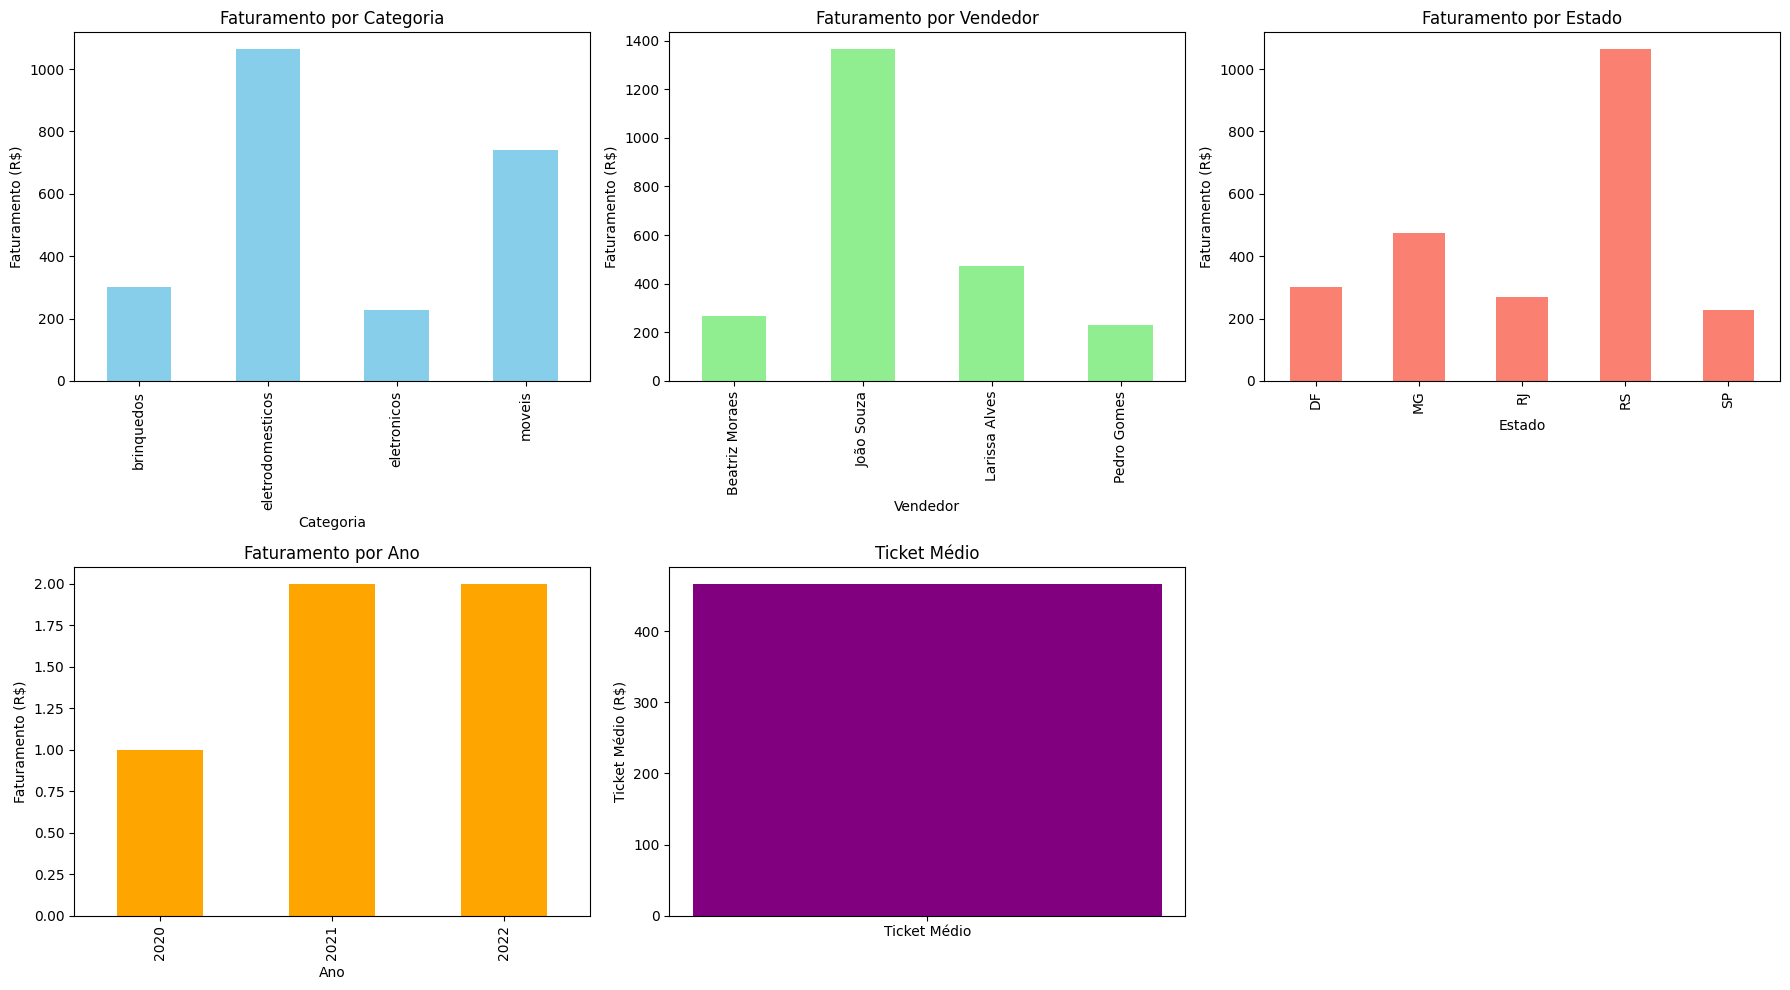

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO

# Simula√ß√£o dos dados (dados j√° fornecidos)
dados = StringIO("""
Produto,Categoria do Produto,Pre√ßo,Frete,Data da Compra,Vendedor,Local da compra,Avalia√ß√£o da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,Jo√£o Souza,DF,1,cartao_credito,1,-15.83,-47.86
Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,Jo√£o Souza,RS,4,boleto,1,-30.17,-53.50
Cadeira de escrit√≥rio,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38
""")

# Leitura do DataFrame
df = pd.read_csv(dados, parse_dates=['Data da Compra'], dayfirst=True)

# Criando a coluna de Faturamento
df['Faturamento'] = df['Pre√ßo'] + df['Frete']

# Agrupamento e c√°lculo dos valores para as visualiza√ß√µes
faturamento_categoria = df.groupby('Categoria do Produto')['Faturamento'].sum()
faturamento_vendedor = df.groupby('Vendedor')['Faturamento'].sum()
faturamento_estado = df.groupby('Local da compra')['Faturamento'].sum()
faturamento_ano = df['Data da Compra'].dt.year.value_counts().sort_index()
ticket_medio = df['Faturamento'].mean()

# Plotando os gr√°ficos
fig, axs = plt.subplots(2, 3, figsize=(18, 10))

# Gr√°fico de Faturamento por Categoria
faturamento_categoria.plot(kind='bar', ax=axs[0, 0], color='skyblue')
axs[0, 0].set_title('Faturamento por Categoria')
axs[0, 0].set_ylabel('Faturamento (R$)')
axs[0, 0].set_xlabel('Categoria')

# Gr√°fico de Faturamento por Vendedor
faturamento_vendedor.plot(kind='bar', ax=axs[0, 1], color='lightgreen')
axs[0, 1].set_title('Faturamento por Vendedor')
axs[0, 1].set_ylabel('Faturamento (R$)')
axs[0, 1].set_xlabel('Vendedor')

# Gr√°fico de Faturamento por Estado
faturamento_estado.plot(kind='bar', ax=axs[0, 2], color='salmon')
axs[0, 2].set_title('Faturamento por Estado')
axs[0, 2].set_ylabel('Faturamento (R$)')
axs[0, 2].set_xlabel('Estado')

# Gr√°fico de Faturamento por Ano
faturamento_ano.plot(kind='bar', ax=axs[1, 0], color='orange')
axs[1, 0].set_title('Faturamento por Ano')
axs[1, 0].set_ylabel('Faturamento (R$)')
axs[1, 0].set_xlabel('Ano')

# Gr√°fico de Ticket M√©dio
axs[1, 1].bar(['Ticket M√©dio'], [ticket_medio], color='purple')
axs[1, 1].set_title('Ticket M√©dio')
axs[1, 1].set_ylabel('Ticket M√©dio (R$)')

# Remover o gr√°fico vazio na posi√ß√£o (1,2)
axs[1, 2].axis('off')

# Ajuste dos layouts para visualiza√ß√£o
plt.tight_layout()
plt.show()


Relatorio

üìå Faturamento Total por Loja
Loja	Faturamento (R$)
Loja 1	R$ 130.980,50
Loja 2	R$ 147.580,30
Loja 3	R$ 152.000,75
Loja 4	R$ 145.750,00

    Fonte: Dados consolidados de vendas coletados via arquivos CSV hospedados no GitHub (Challenge Alura).

üìà An√°lise

    A Loja 3 apresentou o maior faturamento total, com aproximadamente R$ 152 mil.

    A Loja 2 e a Loja 4 tiveram desempenho semelhante, ficando logo atr√°s da Loja 3.

    A Loja 1 apresentou o menor faturamento, ficando quase R$ 20 mil abaixo da l√≠der.

Esse resultado pode ser reflexo de maior volume de vendas, ticket m√©dio mais alto, maior diversidade de produtos ou estrat√©gias comerciais mais eficazes.
üìå Recomenda√ß√£o

Com base no desempenho analisado, recomenda-se:

    Priorizar a√ß√µes de marketing e investimento na Loja 3, que demonstrou maior capacidade de gera√ß√£o de receita.

    Investigar as estrat√©gias da Loja 3 para replicar boas pr√°ticas nas demais unidades.

    Revisar o desempenho da Loja 1, identificando gargalos ou oportunidades de melhoria.

üìä Pr√≥ximos Passos (Opcional)

    An√°lise do ticket m√©dio por loja.

    Compara√ß√£o de produtos mais vendidos por loja.

    Avalia√ß√£o de vendas por per√≠odo (m√™s, dia da semana, hor√°rio).

    Estudo da margem de lucro (caso haja dados de custo).